In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
base_url = 'https://api.pushshift.io/reddit/submission/search'

In [5]:
current_time = time.time()
current_time = round(current_time)

In [6]:
current_time

1679865168

Updated through time = 1679865168

In [7]:
%time

vegan_posts = []

params_until = {
    'subreddit': 'vegan',
    'limit': 1000,
    'until': current_time,
    'sort': 'created_utc',
    'order': 'desc'
}

num_posts = 0
total_time = 0

for _ in range(100):
    start = time.time()
    res = requests.get(base_url, params_until)
    print(res.status_code) #error on status code/manage status
    try:
        posts = pd.DataFrame(res.json()['data'])
        posts = posts[['title', 'selftext', 'created_utc']] #maintain as much as you can for as long as possible
        vegan_posts.append(posts)
        params_until['until'] = posts['created_utc'].min()
        num_posts += len(posts) #break down if num_posts isn't increasing
        end = time.time()
        time_to = end - start
        total_time += time_to
    except:
        pass
    #build in SOME cleaning
    print(f"time to scrape: {time_to}; num posts: {num_posts}") #manage print outs

Wall time: 0 ns
200
time to scrape: 8.816977500915527; num posts: 999
200
time to scrape: 12.660608530044556; num posts: 1999
200
time to scrape: 8.73671817779541; num posts: 2999
524
time to scrape: 8.73671817779541; num posts: 2999
524
time to scrape: 8.73671817779541; num posts: 2999
200
time to scrape: 23.152525663375854; num posts: 3999
200
time to scrape: 9.348289728164673; num posts: 4998
200
time to scrape: 7.639333963394165; num posts: 5997
200
time to scrape: 8.024364709854126; num posts: 6996
200
time to scrape: 8.9463050365448; num posts: 7993
200
time to scrape: 7.091223239898682; num posts: 8992
200
time to scrape: 8.184841632843018; num posts: 9991
200
time to scrape: 8.723870515823364; num posts: 10989
200
time to scrape: 10.003413200378418; num posts: 11989
200
time to scrape: 9.261311769485474; num posts: 12987
524
time to scrape: 9.261311769485474; num posts: 12987
200
time to scrape: 8.84516716003418; num posts: 13987
200
time to scrape: 8.711037397384644; num posts

In [8]:
%time

plant_posts = []

params_until = {
    'subreddit': 'PlantBasedDiet',
    'limit': 1000,
    'until': current_time,
    'sort': 'created_utc',
    'order': 'desc'
}

num_posts = 0
total_time = 0

for _ in range(100):
    start = time.time()
    res = requests.get(base_url, params_until)
    print(res.status_code) #error on status code/manage status
    try:
        posts = pd.DataFrame(res.json()['data'])
        posts = posts[['title', 'selftext', 'created_utc']] #maintain as much as you can for as long as possible
        plant_posts.append(posts)
        params_until['until'] = posts['created_utc'].min()
        num_posts += len(posts) #break down if num_posts isn't increasing
        end = time.time()
        time_to = end - start
        total_time += time_to
    except:
        pass
    #build in SOME cleaning
    print(f"time to scrape: {time_to}; num posts: {num_posts}") #manage print outs

Wall time: 0 ns
524
time to scrape: 8.937079191207886; num posts: 0
200
time to scrape: 44.16149115562439; num posts: 1000
200
time to scrape: 48.98165202140808; num posts: 2000
200
time to scrape: 7.8925487995147705; num posts: 3000
200
time to scrape: 8.49304723739624; num posts: 4000
200
time to scrape: 5.643964529037476; num posts: 4998
200
time to scrape: 5.585209369659424; num posts: 5997
524
time to scrape: 5.585209369659424; num posts: 5997
200
time to scrape: 6.424221992492676; num posts: 6997
200
time to scrape: 9.780641078948975; num posts: 7996
200
time to scrape: 5.925064563751221; num posts: 8995
524
time to scrape: 5.925064563751221; num posts: 8995
200
time to scrape: 6.0086119174957275; num posts: 9995
200
time to scrape: 5.967819929122925; num posts: 10994
200
time to scrape: 6.0958216190338135; num posts: 11990
200
time to scrape: 5.388851642608643; num posts: 12989
524
time to scrape: 5.388851642608643; num posts: 12989
524
time to scrape: 5.388851642608643; num pos

In [9]:
vegan = pd.concat(vegan_posts)
plant = pd.concat(plant_posts)

In [10]:
vegan.to_csv('vegan.csv',index=False)
plant.to_csv('plant.csv',index=False)

78

In [8]:
vegan.head()

,title,selftext,created_utc
0,Last friday someone from my college told me it...,So me and a women from my college talked a lit...,1679855229
1,Appreciation Post for How Far We’ve Come in Pl...,,1679855162
2,Just Got A 30 Day Ban on a Left Wing Sub,[removed],1679854478
3,Anyone here cycle off/on their supplement vita...,[removed],1679854077
4,feeling hopeless about it all,When I'm thinking of all the baby chicks getti...,1679853443


In [10]:
vegan['length'] = vegan['selftext'].apply(lambda x: len(x))

In [11]:
vegan['length'].value_counts()

0       35793
9       23057
58        400
49        147
141        57
        ...  
1885        1
2680        1
6186        1
3335        1
4152        1
Name: length, Length: 2634, dtype: int64

In [12]:
vegan['word_count'] = vegan['selftext'].apply(lambda x: x.count(' '))

In [13]:
vegan['word_count'].value_counts()

0       59044
1         596
64        142
46        141
63        140
        ...  
565         1
1249        1
6561        1
631         1
1450        1
Name: word_count, Length: 771, dtype: int64

In [14]:
vegan.sort_values(by = 'word_count', ascending=False).head()

,title,selftext,created_utc,length,word_count
819,"Debunking ""Eating less Meat won't save the Pla...",# 1) Why are people saying Cows are bad for t...,1619532952,29925,6561
757,"Not sure if anyone has done this already, but ...",Is there anything I forgot?\n\n# Nutrition\n\n...,1614723040,29522,3931
123,If aliens invaded Earth and wanted to eat us b...,“This crime most heinous shall be punished by ...,1589794286,22186,3801
649,Does anyone want to help create the perfect so...,Plan for earth\n\nFeel free to skip my ramble ...,1587685451,23243,3795
858,Ethics and environment-related arguments again...,I've made a simplified version of my notes on ...,1596788008,29982,3773


In [15]:
vegan.sort_values(by = 'word_count').head()

,title,selftext,created_utc,length,word_count
1,smh,,1613520873,0,0
71,"Went on a captive Orca binge watch, wanna disc...",[deleted],1611505981,9,0
72,Popular opinion,[removed],1611505912,9,0
671,Climate change: Top 10 tips to reduce carbon f...,,1589950686,0,0
74,Not even fair,,1611505506,0,0


In [16]:
vegan.sort_values(by = 'length', ascending=False).head()

,title,selftext,created_utc,length,word_count
193,Dairy Health Detriments Resource,# [Cancer]:\n\n&gt;Association of Dietary Inta...,1592291186,30437,2540
858,Ethics and environment-related arguments again...,I've made a simplified version of my notes on ...,1596788008,29982,3773
819,"Debunking ""Eating less Meat won't save the Pla...",# 1) Why are people saying Cows are bad for t...,1619532952,29925,6561
757,"Not sure if anyone has done this already, but ...",Is there anything I forgot?\n\n# Nutrition\n\n...,1614723040,29522,3931
649,Does anyone want to help create the perfect so...,Plan for earth\n\nFeel free to skip my ramble ...,1587685451,23243,3795


In [17]:
vegan.sort_values(by = 'length').head(50)

,title,selftext,created_utc,length,word_count
1,smh,,1613520873,0,0
329,I wanted to share my vegan cookbook for free s...,,1614115262,0,0
330,Deleted Scene from our film The Save Movement ...,,1614115187,0,0
335,Any of y’all know how to make some bomb ass ve...,,1614113814,0,0
337,Do y'all like hearing outreach convos? Online ...,,1614113406,0,0
340,THC vegan banana bread. Vegan btw.,,1614112419,0,0
344,Did anyone actually get the shirts? Mine was d...,,1614111476,0,0
347,Here is a song I wrote after going vegan,,1614110820,0,0
118,Am i doing this right? 😂,,1589797685,0,0
326,Deleted Scene from our film The Save Movement ...,,1614115947,0,0


<AxesSubplot:>

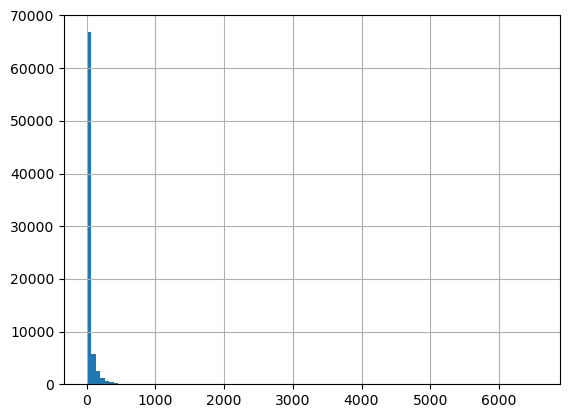

In [18]:
# log or cut off y axis
vegan['word_count'].hist(bins=100)

<AxesSubplot:>

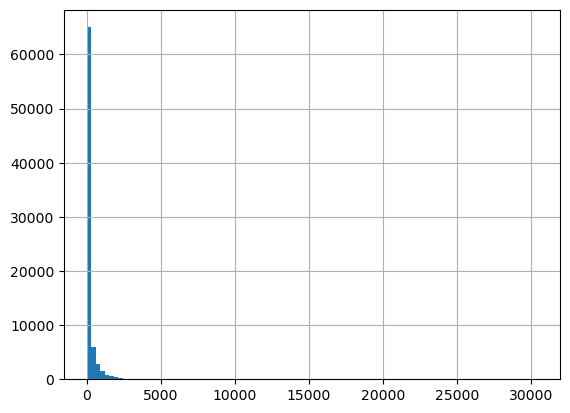

In [19]:
vegan['length'].hist(bins=100)

# Plant-Based Diet

In [21]:
base_url = 'https://api.pushshift.io/reddit/submission/search'

In [22]:
current_time = time.time()
current_time = round(current_time)

In [23]:
%time

all_posts = []

params_until = {
    'subreddit': 'PlantBasedDiet',
    'limit': 1000,
    'until': current_time,
    'sort': 'created_utc',
    'order': 'desc'
}

num_posts = 0
total_time = 0

for _ in range(100):
    start = time.time()
    res = requests.get(base_url, params_until)
    print(res.status_code) #error on status code/manage status
    try:
        posts = pd.DataFrame(res.json()['data'])
        posts = posts[['title', 'selftext', 'created_utc']] #maintain as much as you can for as long as possible
        all_posts.append(posts)
        params_until['until'] = posts['created_utc'].min()
        num_posts += len(posts) #break down if num_posts isn't increasing
        end = time.time()
        time_to = end - start
        total_time += time_to
    except:
        pass
    #build in SOME cleaning
    print(f"time to scrape: {time_to}; num posts: {num_posts}") #manage print outs

Wall time: 0 ns
200
time to scrape: 8.139429569244385; num posts: 1000
524
time to scrape: 8.139429569244385; num posts: 1000
200
time to scrape: 4.436843395233154; num posts: 2000
200
time to scrape: 8.992953062057495; num posts: 3000
200
time to scrape: 6.503392934799194; num posts: 4000
200
time to scrape: 5.005337238311768; num posts: 4998
200
time to scrape: 60.26554036140442; num posts: 5997
200
time to scrape: 7.118423700332642; num posts: 6997
200
time to scrape: 5.904013395309448; num posts: 7995
200
time to scrape: 5.451370000839233; num posts: 8995
200
time to scrape: 4.3642706871032715; num posts: 9995
200
time to scrape: 3.624269485473633; num posts: 10993
524
time to scrape: 3.624269485473633; num posts: 10993
200
time to scrape: 8.210896492004395; num posts: 11989
200
time to scrape: 5.599708795547485; num posts: 12987
524
time to scrape: 5.599708795547485; num posts: 12987
200
time to scrape: 6.812446594238281; num posts: 13981
200
time to scrape: 7.403359413146973; num

In [24]:
all_posts

[                                                 title  \
 0    Sunday Breakfast. steel cut oats with cinnamon...   
 1    does anyone know what is this in my bag of qui...   
 2                      First 24 hours meat/cheese free   
 3      High cholesterol low triglycerides on my diet?!   
 4    Brewers Diet: Food List for Liver Detox and We...   
 ..                                                 ...   
 995                                 Best Quiet Recipes   
 996  Shane Sterling | This Man is Over 50 and RAW V...   
 997                          🔥🔥Plant based cook book🔥🔥   
 998  Is whole food plant-based diet actually health...   
 999                                             recipe   
 
                                               selftext  created_utc  
 0                                                        1679844779  
 1                                                        1679842952  
 2                                            [removed]   1679833521  
 3    

In [26]:
plant = pd.concat(all_posts)

In [28]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 483
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21458 non-null  object
 1   selftext     21458 non-null  object
 2   created_utc  21458 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 670.6+ KB


In [29]:
plant['length'] = plant['selftext'].apply(lambda x: len(x))

In [30]:
plant['length'].value_counts()

0       9733
9       4054
133       28
174       25
215       22
        ... 
1967       1
1260       1
3428       1
1752       1
1906       1
Name: length, Length: 1777, dtype: int64

In [31]:
plant['word_count'] = plant['selftext'].apply(lambda x: x.count(' '))

In [32]:
plant['word_count'].value_counts()

0       13820
42         86
26         83
41         76
37         75
        ...  
732         1
924         1
1021        1
585         1
523         1
Name: word_count, Length: 541, dtype: int64

In [14]:
vegan.sort_values(by = 'word_count', ascending=False).head()

,title,selftext,created_utc,length,word_count
819,"Debunking ""Eating less Meat won't save the Pla...",# 1) Why are people saying Cows are bad for t...,1619532952,29925,6561
757,"Not sure if anyone has done this already, but ...",Is there anything I forgot?\n\n# Nutrition\n\n...,1614723040,29522,3931
123,If aliens invaded Earth and wanted to eat us b...,“This crime most heinous shall be punished by ...,1589794286,22186,3801
649,Does anyone want to help create the perfect so...,Plan for earth\n\nFeel free to skip my ramble ...,1587685451,23243,3795
858,Ethics and environment-related arguments again...,I've made a simplified version of my notes on ...,1596788008,29982,3773


In [15]:
vegan.sort_values(by = 'word_count').head()

,title,selftext,created_utc,length,word_count
1,smh,,1613520873,0,0
71,"Went on a captive Orca binge watch, wanna disc...",[deleted],1611505981,9,0
72,Popular opinion,[removed],1611505912,9,0
671,Climate change: Top 10 tips to reduce carbon f...,,1589950686,0,0
74,Not even fair,,1611505506,0,0


In [16]:
vegan.sort_values(by = 'length', ascending=False).head()

,title,selftext,created_utc,length,word_count
193,Dairy Health Detriments Resource,# [Cancer]:\n\n&gt;Association of Dietary Inta...,1592291186,30437,2540
858,Ethics and environment-related arguments again...,I've made a simplified version of my notes on ...,1596788008,29982,3773
819,"Debunking ""Eating less Meat won't save the Pla...",# 1) Why are people saying Cows are bad for t...,1619532952,29925,6561
757,"Not sure if anyone has done this already, but ...",Is there anything I forgot?\n\n# Nutrition\n\n...,1614723040,29522,3931
649,Does anyone want to help create the perfect so...,Plan for earth\n\nFeel free to skip my ramble ...,1587685451,23243,3795


In [17]:
vegan.sort_values(by = 'length').head(50)

,title,selftext,created_utc,length,word_count
1,smh,,1613520873,0,0
329,I wanted to share my vegan cookbook for free s...,,1614115262,0,0
330,Deleted Scene from our film The Save Movement ...,,1614115187,0,0
335,Any of y’all know how to make some bomb ass ve...,,1614113814,0,0
337,Do y'all like hearing outreach convos? Online ...,,1614113406,0,0
340,THC vegan banana bread. Vegan btw.,,1614112419,0,0
344,Did anyone actually get the shirts? Mine was d...,,1614111476,0,0
347,Here is a song I wrote after going vegan,,1614110820,0,0
118,Am i doing this right? 😂,,1589797685,0,0
326,Deleted Scene from our film The Save Movement ...,,1614115947,0,0
